# Homework 1
## Part a: Constant Temperature Anemometry (5 points)
### a1)

Text(0.5, 1.0, 'CTA measurment with bubbles')

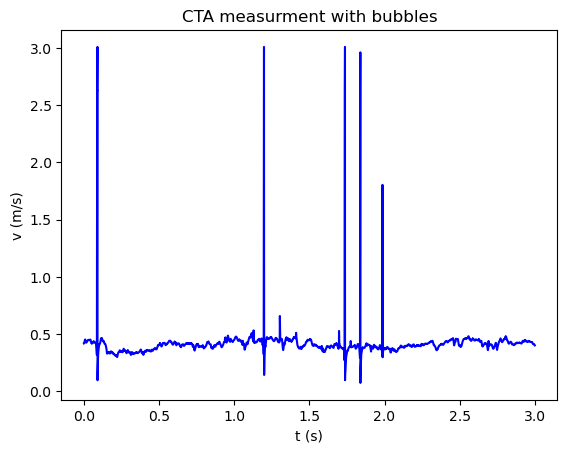

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# using loadtxt()
arr = np.loadtxt("Data/CTA_data.csv", skiprows=1, delimiter=',')
t = arr[:30000-1,0]
v = arr[:30000-1, 1]
mask = arr[:30000-1,2]

plt.figure()
plt.plot(t, v, c='b')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.title('CTA measurment with bubbles')

Text(0.5, 1.0, 'CTA measurment without bubbles')

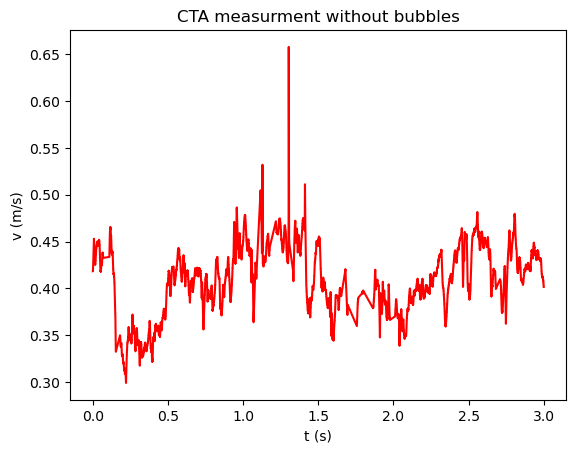

In [2]:
vmask = np.ma.masked_where(mask==0, v)
vmask = vmask.compressed()
tmask = np.ma.masked_where(mask==0, t)
tmask = tmask.compressed()

plt.figure()
plt.plot(tmask, vmask, c='r')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.title('CTA measurment without bubbles')

### a2)

In [3]:
mean_bub = np.mean(v)
std_bub = np.std(v)
mean_nobub = np.mean(vmask)
std_nobub = np.std(vmask)

print(f'mean with bubbles = {mean_bub}')
print(f'std with bubbles = {std_bub}')
print(f'mean without bubbles = {mean_nobub}')
print(f'std without bubbles = {std_nobub}')

mean with bubbles = 0.413608773846432
std with bubbles = 0.13594165854147483
mean without bubbles = 0.40863826061109554
std without bubbles = 0.03685231649922774


As we can see from the values listed above, the mean is almost the same for sets of data (with and without bubbles). There is a more significant difference for the standard deviation, which is much smaller for the case without bubbles. This makes sense, as the standard deviation is a measure for how much the velocity fluctuates around the mean. The bubbles cause outliers in the data, removing these outliers gives a smaller standard deviation. The mean is not as affected, because there are so many other datapoints with which to calculate the mean.

### a3)
See the figures below, one shows the PDF on a logarithmic scale. If we choose the bin size too small (i.e. too many bins), then there is a good chance some bins will be empty and we will get an awkward discontinous graph. If we choose the bin size too big, then we might loose inforation such as local maxima and minima in the spectrum. In our case, choosing the nr of bins to be 30 or more gives "holes" in the spectrum, so the nr of bins was chosen to be 25 .... TO DO!!! (equal bins size or nr of bins)

Text(0.5, 1.0, 'PDF of velocity (logarithmic)')

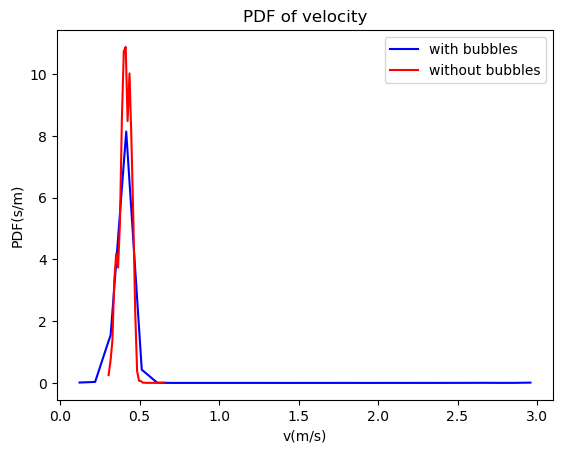

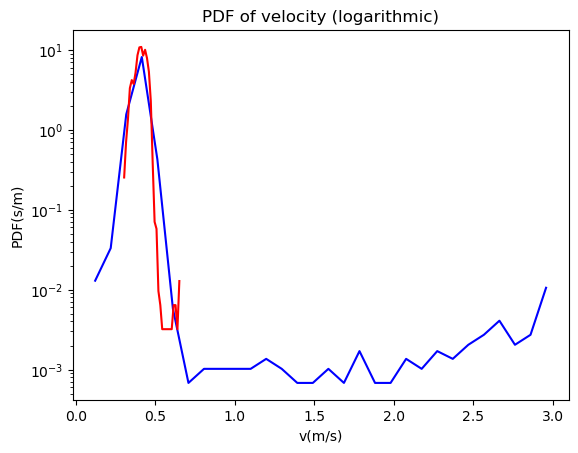

In [20]:
n = 30

a = np.histogram(v, bins=n, density=True)
dv = abs((a[1][1]-a[1][2]))*0.5
binmids = dv + a[1][:-1]

n = 30
a1 = np.histogram(vmask, bins=n, density=True)
dv = abs((a1[1][1]-a1[1][2]))*0.5
binmids1 = dv + a1[1][:-1]


plt.figure()
plt.plot(binmids, a[0], color='b', label='with bubbles')
plt.plot(binmids1, a1[0], color='r', label='without bubbles')
plt.legend()
plt.xlabel('v(m/s)')
plt.ylabel('PDF(s/m)')
plt.title('PDF of velocity')

plt.figure()
plt.plot(binmids, a[0], color='b', label='with bubbles')
plt.plot(binmids1, a1[0], color='r', label='without bubbles')
plt.yscale('log')
plt.xlabel('v(m/s)')
plt.ylabel('PDF(s/m)')
plt.title('PDF of velocity (logarithmic)')

## Part b: Thermistor principles and calibration (9 points)
### b1)

In [6]:
from scipy.optimize import curve_fit

def func(R, a, b, c):
    return a + b*np.log(R) + c*(np.log(R)**3)

# using loadtxt()
arr = np.loadtxt("Data/thermistor.csv", skiprows=1, delimiter=',')
R = arr[:,0]
T = arr[:, 1] + 274.15 #convert to kelvin

#fit to function and plot
popt, pcov = curve_fit(func, R, 1/T)

A = popt[0]
B = popt[1]
C = popt[2]

print(f'A={A}')
print(f'B={B}')
print(f'C={C}')

A=0.0009996198771882211
B=0.00024188011105945483
C=1.4298002462488896e-07


### b2)

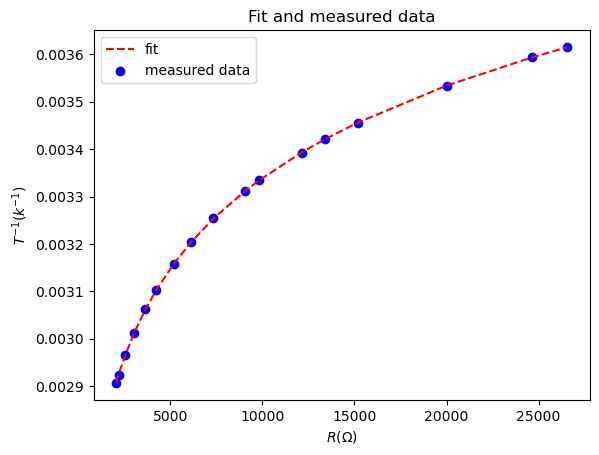

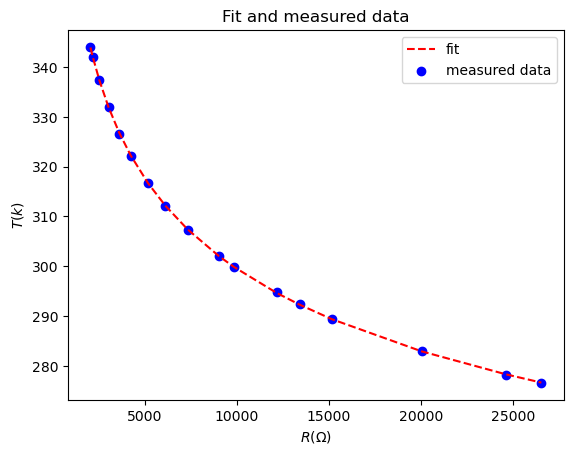

In [9]:
Tcalc = 1/func(R, *popt)

plt.plot(R, func(R, *popt), 'r--', label='fit')
plt.scatter(R, 1/T, c='b', label='measured data')
plt.xlabel(r'$R(\Omega)$')
plt.ylabel(r'$T^{-1}(k^{-1})$')
plt.title('Fit and measured data')
plt.legend()

plt.figure()
plt.plot(R, 1/func(R, *popt), 'r--', label='fit')
plt.scatter(R, T, c='b', label='measured data')
plt.xlabel(r'$R(\Omega)$')
plt.ylabel(r'$T(k)$')
plt.title('Fit and measured data')
plt.legend()


0.08202433746019136
9.521301659360153e-05


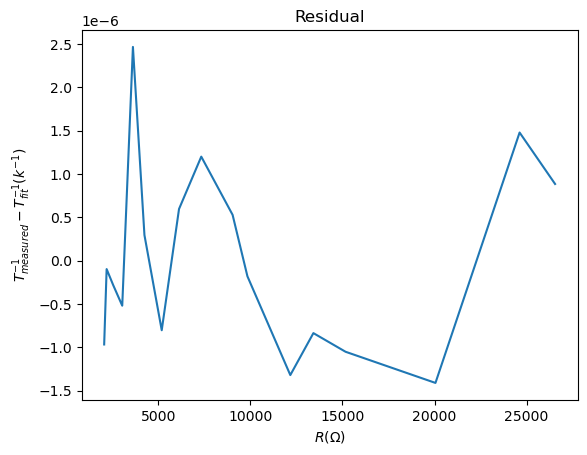

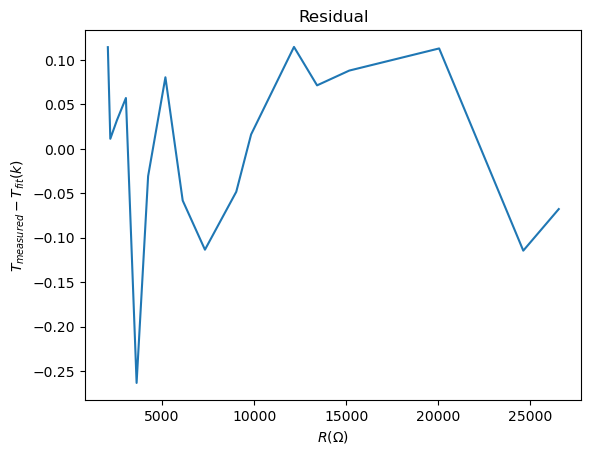

In [14]:
#residual = (1/T) - func(R, *popt)
residual2 = T - (1/func(R, *popt))
#plt.plot(R, residual)
#plt.xlabel(r'$R(\Omega)$')
#plt.ylabel(r'$T_{measured}^{-1}-T_{fit}^{-1}(k^{-1})$')
#plt.title('Residual')

plt.figure()
plt.plot(R, residual2)
plt.xlabel(r'$R(\Omega)$')
plt.ylabel(r'$T_{measured}-T_{fit}(k)$')
plt.title('Residual')

#err = np.average(abs(residual2))
err2 = np.average(residual2)
#print(err)
print(err2)

### b4)
The biggest error is seen around R=3600 $\Omega$, an error of $-0.25 K$ (Assuming our fit is correct). The averaged error is .... TO DO!!!!!!!

### b5)
From the electrical circuit: $V_{th}=R_{th}I_{tot}$ and $V_{tot}=(R_{th}+R_{passive})I_{tot}$, combing the two equations we get
$V_{th}=\frac{R_{th}V{tot}}{R_{th}+R_{passive}}$
$\frac{d V_{th}}{d R_{th}} = \dfrac{R_\text{passive}V_\text{tot}}{\left(R_\text{th}+R_\text{passive}\right)^2}$
From this equation we can see that if we make $R_{passive}$ too big, then $R_{th}$ will not matter in the denominator and we will not have a big change in the measured voltage $V_{th}$ with temperature. On the other hand if we make $R_{passive}$ too small, then the change in $V_{th}$ will also be very small with a change in $R_{th}$. So we want to choose our $R_{passive}$ to be the same order of magnitude as $R_{th}$, so ~$10^{3} \Omega$

### b6)

In [ ]:
Rp = 10**3
Vtot = 10
Vth = R*Vtot/(R+Rp)
Vpas = Vtot- Vth

plt.figure()
plt.plot(Tcalc, Vpas, label=r'$V_{passive}$')
plt.plot(Tcalc, Vth, label=r'$V_{th}$')
plt.xlabel('T(k)')
plt.ylabel('V(V)')
plt.title('Measured voltage as of function of temperature')
plt.legend()